# Анализ оттока клиентов банка "Метанпром"

**Цель исследования: провести анализ оттока клиентов, выявить сигменты склонные к оттоку, дать рекомендации по их удержанию.**  

**Задачи исследования: выгрузить и подготовить данные, исследовательский анализ, проверка гипотез, сегментация клиентов, составление рекомендаций по удержанию клиентов из кадого сегмента**

Презентация: https://drive.google.com/drive/folders/1ZhmBBdCz_ptTvNmvIVH3olmFCi3neKhp?usp=sharing


**Описание данных**

Датасет содержит данные о клиентах банка «Метанпром». Банк располагается в Ярославле и областных городах: Ростов Великий и Рыбинск.

**План работы:**

1. [Выгрузка и изучение данных](#start)
2. [Обработка данных](#2)
3. [Исследовательский анализ данных](#3)
4. [Статистический анализ](#5)
5. [Сегментация и приоритизация](#4)
6. [Вывод и рекомендации](#6)

***Шаг 1. Выгрузка и изучение данных.***
<a id="start"></a>

In [1]:
#выгрузка всех необходимых библиотек 
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
!pip install phik
import phik
from phik import resources, report
import warnings
warnings.simplefilter('ignore') 

     |████████████████████████████████| 679 kB 1.1 MB/s eta 0:00:01


In [2]:
data = pd.read_csv('...')
data.head()

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB


In [4]:
#рассмотрю отсутвующие данные в каждой категории
data.isnull().sum()*100/len(data)

USERID            0.00
score             0.00
city              0.00
gender            0.00
age               0.26
equity            0.00
balance          22.95
products          0.00
credit_card       0.00
last_activity     0.00
EST_SALARY        0.00
churn             0.00
dtype: float64

Анализируемая таблица содержит 12 колонок с данными о клиентах банка. Данные 4 столбцов из датасета содержат данные типа float64, 6 int64 и 2 object. В данных присутсвуют пропущенные значения, почти 23 процента в столбце balance и 0.26 процента age. Таблица содержит следующие данные:

    userid — идентификатор пользователя,
    score — баллы кредитного скоринга,
    City — город,
    Gender — пол,
    Age — возраст,
    Objects — количество баллов в собственности,
    Balance — баланс на счёте,
    Products — количество продуктов, которыми пользуется клиент,
    CreditCard — есть ли кредитная карта,
    Loyalty — активный клиент,
    estimated_salary — оценочный доход клиента,
    Churn — признак оттока 

**Шаг 2. Обработка данных**
<a id="2"></a>

In [5]:
#приведу названия столбцов к змеиному регистру 
data.columns = data.columns.str.lower()

In [6]:
#проверю налачие явных дубликатов
data.duplicated().sum()
data

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,120553,814.0,Рыбинск,М,27.0,1,78144.65,1,0,1,18943.64,0
9996,139170,894.0,Ярославль,М,46.0,0,NaN,1,1,0,196898.29,0
9997,115639,903.0,Ярославль,М,24.0,0,NaN,2,1,1,108905.09,0
9998,148700,777.0,Ярославль,Ж,68.0,3,865457.97,3,0,1,86874.90,0


Проверим датафрейм на неявные дубликаты. Буду считать дубликатами те строки, где айди клиента повторяется, так как он должен быть уникальным у каждого пользователя.

In [7]:
#проверяю неявные дубликаты
data['userid'].duplicated().sum()

73

In [8]:
#рассмотрю эти строки 
duplicates = data[data.duplicated(['userid'], keep=False)]
duplicates.head(5)

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
7,218868,825.0,Ярославль,Ж,38.0,4,458145.40,2,1,1,68085.48,0
58,164676,860.0,Ярославль,М,37.0,5,648594.03,2,1,1,213586.86,1
150,185748,850.0,Рыбинск,М,36.0,5,1203376.67,2,0,1,89401.82,1
161,197364,928.0,Рыбинск,Ж,53.0,6,1347183.86,2,0,1,168189.49,1
231,190253,823.0,Рыбинск,М,37.0,4,373348.39,2,0,1,131947.92,1


In [9]:
#рассмотрим пример одного из дубликатов
filtered_data = data.loc[data['userid'] == 218868]
filtered_data

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
7,218868,825.0,Ярославль,Ж,38.0,4,458145.40,2,1,1,68085.48,0
5470,218868,827.0,Рыбинск,Ж,NaN,4,448959.07,2,1,1,67835.95,0


Вижу две строки с одинаковым айди, могу предложить, что это один и тот же человек, переехавший в другой город, и которому в новом пункте банка обновили данные, поэтому создались дубликаты. Проверим гипотезу на следующем примере дубликатов.

In [10]:
filtered_data = data.loc[data['userid'] == 197364]
filtered_data

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
161,197364,928.0,Рыбинск,Ж,53.0,6,1347183.86,2,0,1,168189.49,1
4870,197364,889.0,Ярославль,М,33.0,0,NaN,2,1,1,96173.48,0


На этом примере данное предположение не работает, так как тут отличается несколько параметров сразу, так что мы можем считать что это разные люди. Также есть теория о том, что в некоторых случаях один и тот же клиент может иметь несколько банковских счетов или кредитных карт, которые будут отображаться как разные записи в датасете, также разбивается примером дубликатов выше. Дубликаты могли стать следствием ошибки при заполнении данных или технической проблемы. Не буду удалять эти строки, так как они несут информацию о клиентах, а также  из-за того что эти строки несущественны относительно объемов датасета и не смогут сильно исказить выводы.


**Перехожу к обработке пропусков.**

In [11]:
data.isnull().sum()*100/len(data)

userid            0.00
score             0.00
city              0.00
gender            0.00
age               0.26
equity            0.00
balance          22.95
products          0.00
credit_card       0.00
last_activity     0.00
est_salary        0.00
churn             0.00
dtype: float64

In [12]:
data[data['age'].isna()].head()
data = data.dropna(subset=['age'])


Пропуск типа MAR. Можем удалить данные, так как 0.26 процентов не смогут существенно исказить выводы по датасету.

(*изначально хотела сделать так подскажи пожалуйста было лучше сотавить или удалить* Удалять эти строки нет необходимости, так как они содержат информацию о других показателях разных пользователей, также 0.26 процентов не смогут существенно исказить показатели. )

Переходим к пропускам в балансе. Заполнение пропусков в почти 23 процентов искуственными данными(средние или медианные значения) могут направить исследование по ложному направлению, поэтому прибегнуть к такому мы не можем. 

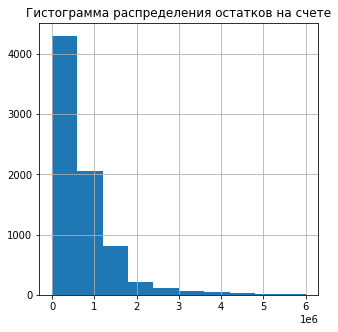

119113552.01

In [13]:
data['balance'].hist(figsize=(5, 5), range=(0, 6000000))
plt.title("Гистограмма распределения остатков на счете")
plt.show()
data['balance'].max()

В распределении осотатков на счете не замечено никаких ошибок на первый взгляд, значения начинаются с 0 и растут до 119 113 552рублей.

In [14]:
#создам датасет с пустым балансом 
data_null = data[data['balance'].isna()]
#создадим датасет где нет пропусков по балансу 
data_without_na = data.dropna(subset=["balance"])
data_without_na.head()

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1
5,202305,856.0,Рыбинск,М,56.0,4,863687.24,3,1,0,156619.80,0


In [15]:
#создам датасет с пустым балансом 
data_null = data[data['balance'].isna()]
#создадим датасет где нет пропусков по балансу 
data_without_na = data.dropna(subset=["balance"])

In [16]:
#сравню показатели по двум датасетам 
display(data_null.describe())

display(data_without_na.describe())

,userid,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn
count,2279.000000,2279.000000,2279.000000,2279.000000,0.0,2279.000000,2279.000000,2279.000000,2.279000e+03,2279.000000
mean,171904.885915,865.357174,42.093023,0.051338,NaN,1.163229,0.815270,0.548925,2.263454e+05,0.005704
std,33303.215270,89.553735,11.941551,0.226623,NaN,0.403713,0.388164,0.497710,1.998256e+05,0.075327
min,114182.000000,642.000000,18.000000,0.000000,NaN,0.000000,0.000000,0.000000,2.027403e+04,0.000000
25%,142992.500000,871.000000,33.000000,0.000000,NaN,1.000000,1.000000,0.000000,1.202174e+05,0.000000
50%,172304.000000,903.000000,40.000000,0.000000,NaN,1.000000,1.000000,1.000000,1.743479e+05,0.000000
75%,201257.000000,922.000000,49.000000,0.000000,NaN,1.000000,1.000000,1.000000,2.403728e+05,0.000000
max,229145.000000,990.000000,86.000000,3.000000,NaN,3.000000,1.000000,1.000000,1.333687e+06,1.000000


,userid,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn
count,7695.000000,7695.000000,7695.000000,7695.000000,7.695000e+03,7695.000000,7695.000000,7695.000000,7.695000e+03,7695.000000
mean,171710.892268,843.744120,42.924366,3.394802,8.272456e+05,2.081222,0.640156,0.515140,1.245204e+05,0.234698
std,33812.862444,55.342539,12.244010,1.584817,1.980327e+06,0.757446,0.479986,0.499803,1.046671e+05,0.423837
min,94561.000000,689.000000,18.000000,0.000000,0.000000e+00,1.000000,0.000000,0.000000,2.546300e+03,0.000000
25%,142638.000000,801.000000,33.000000,2.000000,2.956987e+05,2.000000,0.000000,0.000000,6.755698e+04,0.000000
50%,172710.000000,840.000000,40.000000,4.000000,5.242953e+05,2.000000,1.000000,1.000000,1.062502e+05,0.000000
75%,201145.500000,882.000000,52.000000,5.000000,9.800512e+05,2.000000,1.000000,1.000000,1.551446e+05,0.000000
max,229136.000000,1000.000000,86.000000,9.000000,1.191136e+08,5.000000,1.000000,1.000000,1.395064e+06,1.000000


Мы можем заметить, что группа клиентов с пропусками в балансе отличается от группы с отсутсвием пропусков по этому параметру. 
Скоринг и оценочный доход первой группы выше, чем у второй, однако группа без пропусков в балансе использует в среднем больше продуктов и имеет выше балл собственности. Что касается параметра оттока, среднее у первой группы намного ближе 0(0.0057), чем у второй группы (0.235), а значит в первой группе подавляющее большинство клиентов неотточные. Можно выдвинуть предположение о том, что это новые пользователи которые еще не внесли какую-то сумму на свой баланс, или ,например, клиент пользуется таким банконвский товаром как ипотека или кредит, когда баланс на счете отсутсивует.

Нужно поговорить с представителей банка, чтобы определить точно какое предположение верное, поэтому до этого момента пропуски нужно оставить чтобы проанализировать другие параметры клиента.

Пропуск типа MNAR. 
Так как природу пропусков выявить не удалось, я принимаю решение оставить пропуски на месте для сохранение данных по другим параметрам.

**Проверю аномалии. Рассмотрю количественные показатели.**

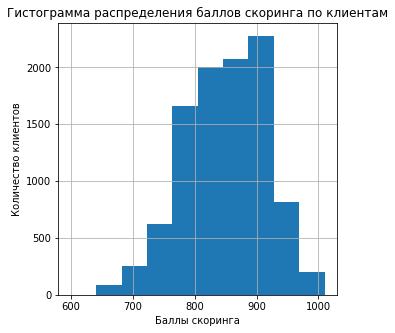

642.0

In [17]:
data['score'].hist(figsize=(5, 5), range=(600, 1010))
plt.title("Гистограмма распределения баллов скоринга по клиентам")
plt.xlabel('Баллы скоринга')
plt.ylabel('Количество клиентов')
plt.show()
data['score'].min()

В столбце со скорингом баллы распределены внутри 1000 бальной системы, ошибок нет.

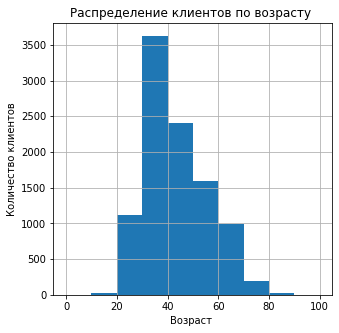

In [18]:
data['age'].hist(figsize=(5, 5), range=(0, 100))
plt.title("Распределение клиентов по возрасту ")
plt.xlabel('Возраст ')
plt.ylabel('Количество клиентов')
plt.show()

Распределение внутри столбца с возрастом клиентов информация не нуждается в редактировании.

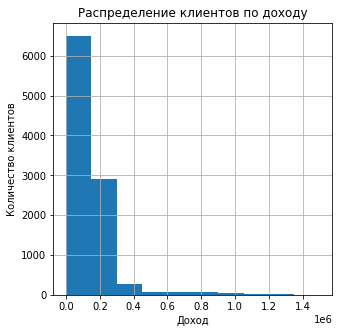

In [19]:
data['est_salary'].hist(figsize=(5, 5), range=(0, 1500000))
plt.title("Распределение клиентов по доходу")
plt.xlabel('Доход')
plt.ylabel('Количество клиентов')
plt.show()

Распределение информации о доходе клиентов имеет выделяющиеся от основной массы значения, однако мы не можем воспринимать их как выбросы и очистиить, так как особо обеспеченные клиенты могут существенно влиять на результаты банка и составлять большую долю операций и прибыли, поэтому этот столбец оставляем без изменений.

**Кодирование данных**

In [20]:
data['sex'] = data['gender']
data = pd.get_dummies(data, columns=['sex'])
data

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,sex_Ж,sex_М
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1,1,0
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0,1,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0,1,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1,1,0
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,120553,814.0,Рыбинск,М,27.0,1,78144.65,1,0,1,18943.64,0,0,1
9996,139170,894.0,Ярославль,М,46.0,0,NaN,1,1,0,196898.29,0,0,1
9997,115639,903.0,Ярославль,М,24.0,0,NaN,2,1,1,108905.09,0,0,1
9998,148700,777.0,Ярославль,Ж,68.0,3,865457.97,3,0,1,86874.90,0,1,0


In [21]:
data['city_1'] = data['city']
data = pd.get_dummies(data, columns=['city_1'])
data = data.rename (columns = ({'city_1_Ростов':'Ростов', 'city_1_Рыбинск':'Рыбинск','city_1_Ярославль':'Ярославль', 'sex_Ж':'female', 'sex_М':'male'}))
data

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,female,male,Ростов,Рыбинск,Ярославль
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1,1,0,0,1,0
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0,1,0,0,1,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0,1,0,0,1,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1,1,0,0,0,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,120553,814.0,Рыбинск,М,27.0,1,78144.65,1,0,1,18943.64,0,0,1,0,1,0
9996,139170,894.0,Ярославль,М,46.0,0,NaN,1,1,0,196898.29,0,0,1,0,0,1
9997,115639,903.0,Ярославль,М,24.0,0,NaN,2,1,1,108905.09,0,0,1,0,0,1
9998,148700,777.0,Ярославль,Ж,68.0,3,865457.97,3,0,1,86874.90,0,1,0,0,0,1


**Перевод данных в нужный тип**

In [22]:
#переведу возраст клиентов в нужныц тип
data['age'] = data['age'].astype('Int64')

Выводы по предобработке данных.
- явные дубликаты в датасете не обнаружены 
- неявные дубликаты (одинаковый айди у разных пользователей) обнаружены, однако не были удалены, так как несут важную информацию о клиентах
- обнаружены пропуски в столбцах balance и age. Доля отсуствующих значений в age мала, поэтому они были удалены, однако в столбце balance больше 22 процентов пропусков, поэтому , не обнаружив причин пропусков, данные оставили на месте
- аномалии не выявлены

**Шаг3. Исследовательский анализ данных.** 
<a id="3"></a>

Для начала рассмотрим корреляцию всех пунктов друг с другом, чтобы сразу обратить на зависимость каких-то критериев от других.

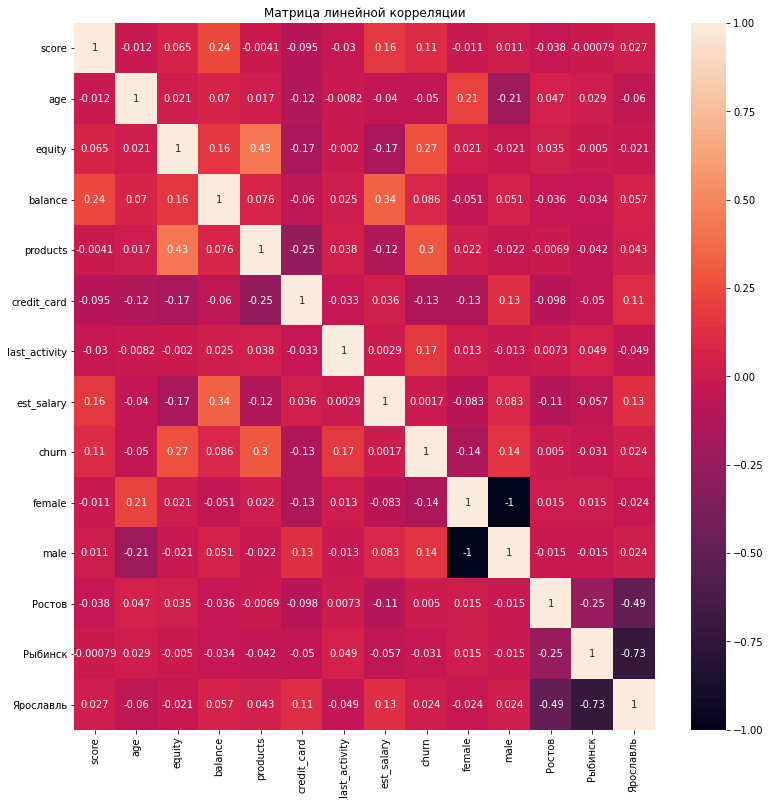

In [23]:
#для удобства посмотрю на корреляцию до кодирования 
he_data = data.drop(['userid'],axis = 1)
plt.figure(figsize = (13,13))
sns.heatmap(he_data.corr(), annot=True)
plt.title('Матрица линейной корреляции')
plt.show()


Самое большое значение по модулю мы получаем по следующим 10 параметрам:
- количеством используемых продуктов и собственностью клиента (0.43)
- корреляция между доходом клиента и балансом на счете (0.34)
- корреляция между фактом оттока и количеством используемых продуктов (0.3)
- корреляция между фактом оттока и собственностью(0.27)
- корреляция между скорингом и балансом (0.24)
- корреляция между наличием кредитной карты и количество используемых продуктов (-0.25)
- корреляция между наличием кредитной карты и собственностью (-0.17)
- корреляция между активностью клиента и фактом оттока (0.17)
- корреляция между скорингом и доходом клиента (0.16)
- между скорингом и фактом оттока (0.11)

Наибольшее значение относительно показателя оттока наблюдается:
- с количеством продуктов в пользовании (0.3)
- с собственностью клиента (0.27)
- с активностью пользователя (0.17)
- с наличием кредитной карты (-0.13)
- c полом клиента( по модялю 0.14)
- с кредитным скорингом (0.11)

Рассмотрим отточных клиентов в разрезе всех признаков более подробно.

Корреляция с оттоком:
- сильная с показателями не выявлена 
- умеренная выявлена с количеством используемых банковский товаров(0.3)
- слабая с собственность клиента (0.27), активностью пользователя(0.17), с полом клиента(0.14), с наличием кредитной карты(-0.13), с кредитным скорингом (0.11)

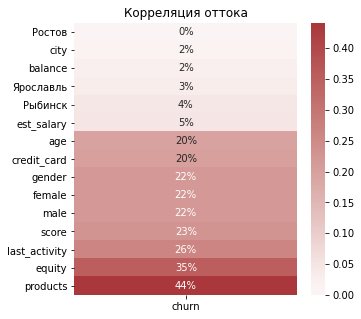

In [24]:
heat_data = data.drop(['userid'],axis = 1).phik_matrix(interval_cols=['balance', 'est_salary', 'score'])
plt.figure(figsize=(5,5))
sns.heatmap((heat_data.loc[:,['churn']].drop('churn').sort_values ('churn')), annot=True, fmt = ".0%", cmap = 'vlag', center = 0)
ax = plt.gca()
ax.set_title('Корреляция оттока')
plt.show()


Как показывает тепловая диаграмма по оттоку отдельно оттоком, самая сильная зависимость наблюдается от параметра products(44%), чуть меньший процент связан с параметром equity(35%), далее параметр last_activity(26%), а далее на примерно одном уровне расположились параметры кредитный скоринг, пол, наличие кредитной карты и возраст. Корреляция с остальными параметрами не превышает 10 процентов поэтому не существенно влияет на отток в большинстве случаев. В дальнейшем стоит фокусироваться именно на параметрах превышающих 10 процентов корреляции.

In [25]:
data_churn = data[data['churn']==1]


Посмотрим на распределение по возрасту в разрезе оттока.

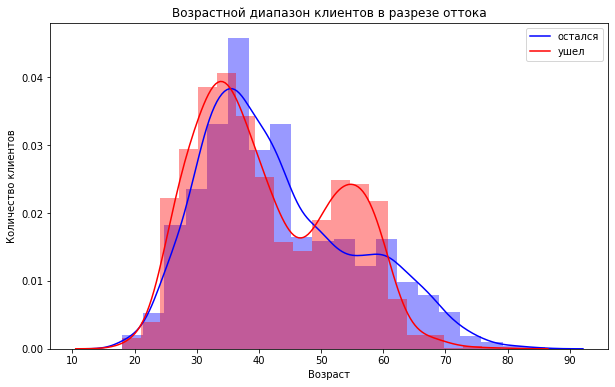

In [26]:
# Отфильтровать данные по churn = 0
age_churn_0 = data[data['churn'] == 0]['age']

# Отфильтровать данные по churn = 1
age_churn_1 = data[data['churn'] == 1]['age']
plt.figure(figsize=(10, 6)) 
# Построить distplot для churn = 0
sns.distplot(age_churn_0, bins=20, color='blue', label='Churn = 0')

# Построить distplot для churn = 1
sns.distplot(age_churn_1, bins=20, color='red', label='Churn = 1')
plt.title('Возрастной диапазон клиентов в разрезе оттока')
# Добавить подписи осей и легенду
plt.xlabel('Возраст')
plt.ylabel('Количество клиентов')
plt.legend(labels = ['остался', 'ушел'])

# Отобразить график
plt.show()

Мы видим небольшое смещение в тенденциях по этому параметру датасета. Мы видим два четкий периода где доля оттока выше чем доля оставшихся клиентов:

1) у клиентов с 25 до 35 лет 

2) у клиентов с 50 до 60 лет 

Рассмотрим распределение по среднему заработку. 

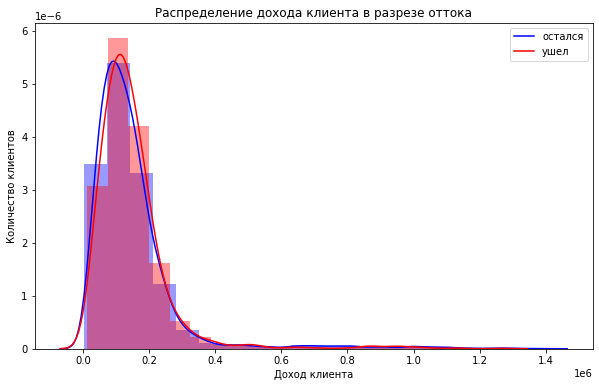

In [27]:
age_churn_0 = data[data['churn'] == 0]['est_salary']

age_churn_1 = data[data['churn'] == 1]['est_salary']
plt.figure(figsize=(10, 6)) 
sns.distplot(age_churn_0, bins=20, color='blue', label='Churn = 0')

sns.distplot(age_churn_1, bins=20, color='red', label='Churn = 1')
plt.xlabel('Доход клиента')
plt.ylabel('Количество клиентов')
plt.legend(labels = ['остался', 'ушел'])
plt.title('Распределение дохода клиента в разрезе оттока')
plt.show()

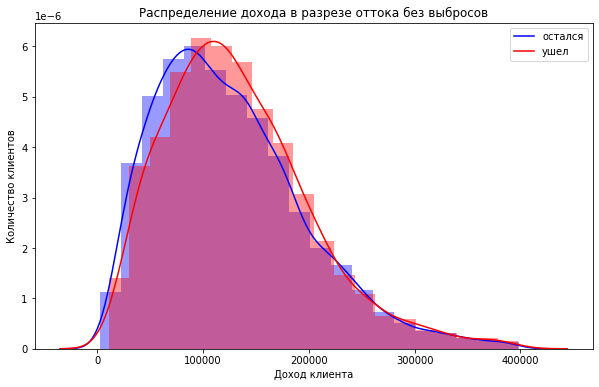

In [28]:
data_for_ = data.query('est_salary < 400000')
age_churn_0 = data_for_[data_for_['churn'] == 0]['est_salary']

age_churn_1 = data_for_[data_for_['churn'] == 1]['est_salary']
plt.figure(figsize=(10, 6)) 
sns.distplot(age_churn_0, bins=20, color='blue', label='Churn = 0')

sns.distplot(age_churn_1, bins=20, color='red', label='Churn = 1')
plt.xlabel('Доход клиента')
plt.ylabel('Количество клиентов')
plt.legend(labels = ['остался', 'ушел'])
plt.title('Распределение дохода в разрезе оттока без выбросов')
plt.show()

Как мы видим по графику очищенному от выбросов, отток начинает превышать оставшихся клиентов после отметки дохода 100 000 рублей.



Мы можем заметить, что оценочный доход ушедших клиентов в среднем выше, чем я уставшихся клиентов.

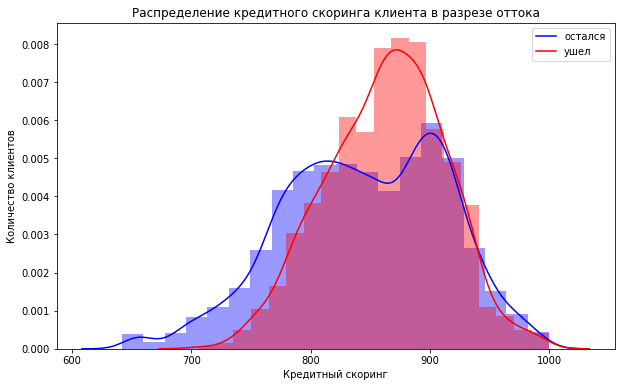

In [29]:
age_churn_0 = data[data['churn'] == 0]['score']

age_churn_1 = data[data['churn'] == 1]['score']
plt.figure(figsize=(10, 6)) 
sns.distplot(age_churn_0, bins=20, color='blue', label='Churn = 0')

sns.distplot(age_churn_1, bins=20, color='red', label='Churn = 1')
plt.xlabel('Кредитный скоринг')
plt.ylabel('Количество клиентов')
plt.legend(labels = ['остался', 'ушел'])
plt.title('Распределение кредитного скоринга клиента в разрезе оттока')
plt.show()

Как показывает получившийся график, кредитный скоринг у клиентов, которые решили уйти, в среднем чаще находится в промежутке с 820 по 900. Баллы ушедших клинтов в среднем выше, чем у оставшихся.

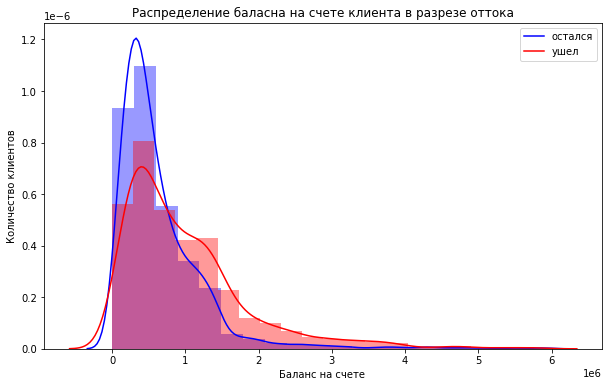

In [30]:
#очищу от выбросов чтобы посмотреть в целом, так как график по всем данным нечитаемый
data_for_graph = data.query('balance < 6000000')
age_churn_0 = data_for_graph[data_for_graph['churn'] == 0]['balance']

age_churn_1 = data_for_graph[data_for_graph['churn'] == 1]['balance']
plt.figure(figsize=(10, 6)) 
sns.distplot(age_churn_0, bins=20, color='blue', label='Churn = 0')

sns.distplot(age_churn_1, bins=20, color='red', label='Churn = 1')
plt.xlabel('Баланс на счете ')
plt.ylabel('Количество клиентов')
plt.legend(labels = ['остался', 'ушел'])
plt.title('Распределение баласна на счете клиента в разрезе оттока')
plt.show()

Мы можем увидеть, что у оставшихся клиентов баланс на счете чаще находится в пределах суммы до 1 млн, однако у ушедших клиентов остаток часто превышает сумму и часто доходит до 2.5 млн.

**Теперь рассмотрим категориальные переменные**

Сначала рассмотрим оценку собственности ушедших клиентов. Нам нужно построить диаграммы с уровнями оттока, чтобы увидеть какая часть клиентов более склонна к оттоку.

Перед этим определим средий уровень оттока по банку.

In [31]:
len(data_churn)/len(data)*100

18.237417284940847

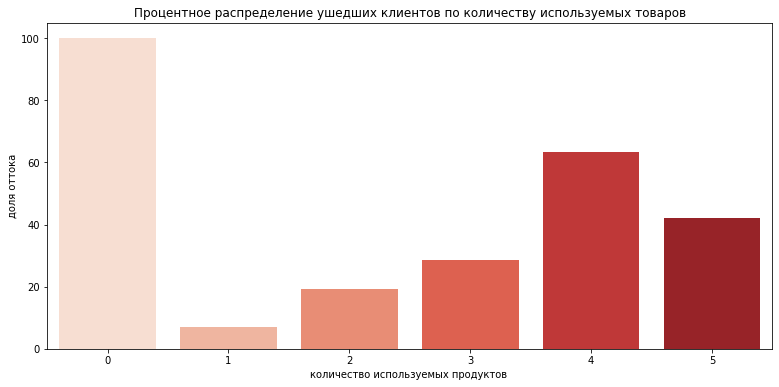

,count,sum,proportion
,churn,churn,
products,,,
0,1,1,100.000000
1,3323,235,7.071923
2,5119,978,19.105294
3,1038,297,28.612717
4,474,300,63.291139
5,19,8,42.105263


In [32]:
products = data.pivot_table (index = 'products', values = 'churn', aggfunc = ['count', 'sum'])
products['proportion'] = products['sum']/products['count']*100
plt.figure(figsize=(13,6))
sns.barplot(x=products.index,y=products['proportion'], palette="Reds")
plt.title("Процентное распределение ушедших клиентов по количеству используемых товаров")
plt.xlabel("количество используемых продуктов ")
plt.ylabel("доля оттока")
plt.show()
products

Барчарт показывает, что 100 процентов пользователей пользующихся 0 продуктов банка попадают в категорию оттока, но так как эта строчка не имеет смысла, мы можем удалить ее из датасета.

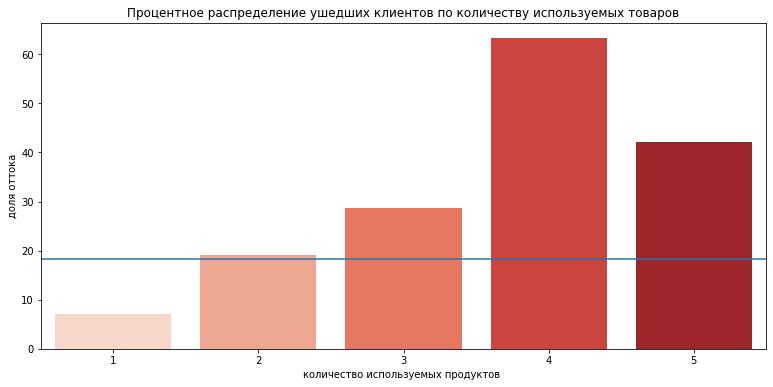

In [33]:
data = data[data['products']!=0]
products = data.pivot_table(index = 'products', values = 'churn', aggfunc = ['count', 'sum'])
products['proportion'] = products['sum']/products['count']*100
products
plt.figure(figsize=(13,6))
sns.barplot(x=products.index,y=products['proportion'], palette="Reds")
plt.title("Процентное распределение ушедших клиентов по количеству используемых товаров")
plt.xlabel("количество используемых продуктов ")
plt.ylabel("доля оттока")
plt.axhline(data['churn'].mean()*100)
plt.show()


Теперь мы видим, что в люди пользующиеся 4 продуктами от банка более склонны к оттоку(процент оттока более 60 процентов ). Самая безопасная группа клиентов - те, кто использует 1-2 товара, так как доля оттока там не превышает 20 процентов.
Средний показатель по банку 18 процентов, поэтому превыщающий этот процент показатели привлекают наше внимание, поэтому клиенты у которых в пользовании более 2 товаров являются более рискванной группой.
По аналогии рассмотрим собственность клиентов входищих в группу оттока.

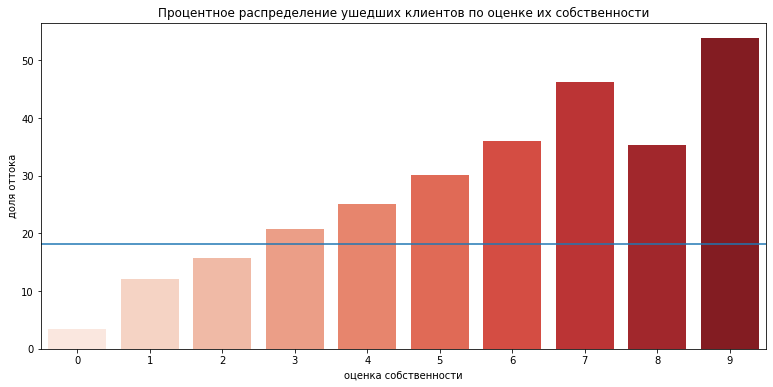

,count,sum,proportion
,churn,churn,
equity,,,
0,2576,90,3.493789
1,773,93,12.031048
2,1051,166,15.794481
3,1540,321,20.844156
4,1847,464,25.121819
5,1915,576,30.078329
6,161,58,36.024845
7,80,37,46.250000


In [34]:
equity = data.pivot_table(index = 'equity', values = 'churn', aggfunc = ['count', 'sum'])
equity['proportion'] = equity['sum']/equity['count']*100
plt.figure(figsize=(13,6))
sns.barplot(x=equity.index,y=equity['proportion'], palette="Reds")
plt.title("Процентное распределение ушедших клиентов по оценке их собственности")
plt.xlabel("оценка собственности")
plt.ylabel("доля оттока")
plt.axhline(data['churn'].mean()*100)
plt.show()
equity

Получившаяся таблица и диаграмма показывает, что в целом, исключая оценку 8, выявлена линейная зависимость между оценкой собственности и долей оттока. Доля оттока плавно повышается с оценки 0, где доля равна 3.5% до 7 баллов с долей 46.25 и 9 баллов с почти 54% оттока, только в отметке 8 показатель падает до 35 процентов оттока от общего количества клиентов.

  Так как средний отток по банку составляет 18 процентов, то наше внимание привлекают все клиенты с 3 и более баллами собствтенности. Имеено этих клиентов мы отнесем к небезопасным для нашего банка.


Рассмотрим клиентов на факт наличия кредитной карты.

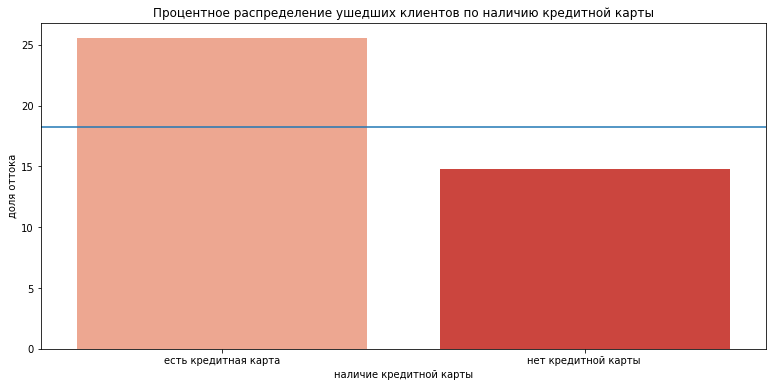

,count,sum,proportion
,churn,churn,
credit_card,,,
0,3189,815,25.556601
1,6784,1003,14.784788


In [35]:
credit_card = data.pivot_table(index = 'credit_card', values = 'churn', aggfunc = ['count', 'sum'])
credit_card['proportion'] = credit_card['sum']/credit_card['count']*100
credit_card
#labels = ["есть кредитная карта", "нет кредитной карты "]
#values = [14.784788, 25.556601]

# Строим график
plt.figure(figsize=(13,6))
#sns.barplot(x=labels, y=values, palette="Reds")
#plt.xticks(rotation=0)
sns.barplot(x=credit_card.index,y=credit_card['proportion'], palette="Reds")
sns.barplot(x=["есть кредитная карта", "нет кредитной карты "],y=credit_card['proportion'], palette="Reds")
plt.title("Процентное распределение ушедших клиентов по наличию кредитной карты")
plt.xlabel("наличие кредитной карты")
plt.axhline(data['churn'].mean()*100)
plt.ylabel("доля оттока")
plt.show()
credit_card

Как показывает барчарт, среди тех, кто пользовался кредитной картой, процент оттока ниже(почти 15 процентов), чем у тех, кто ей не пользовался(25.6 процентов). Отток для пользователей которые не пользуются кредитными картами банка выше среднего значения для всего банка, поэтому в дальнейшем нужно сделать акцент на продвижение кредитки среди клиентов.

Перейдем к ушедшим клиентам в разрезе активности.

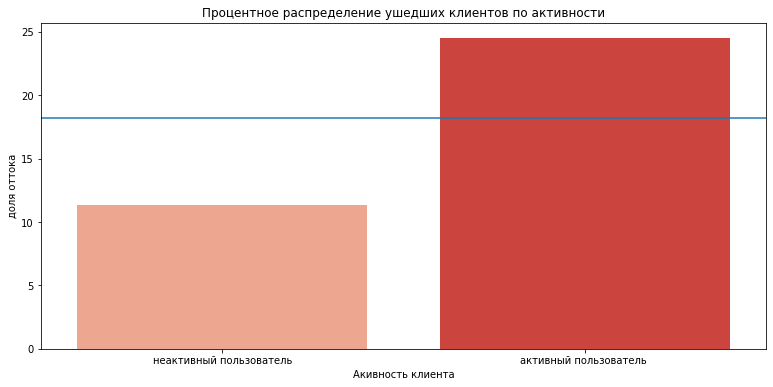

,count,sum,proportion
,churn,churn,
last_activity,,,
0,4758,541,11.370324
1,5215,1277,24.487057


In [36]:
last_activity = data.pivot_table(index = 'last_activity', values = 'churn', aggfunc = ['count', 'sum'])
last_activity['proportion'] = last_activity['sum']/last_activity['count']*100
plt.figure(figsize=(13,6))
sns.barplot(x=last_activity.index,y=last_activity['proportion'], palette="Reds")
sns.barplot(x=["неактивный пользователь", "активный пользователь "],y=last_activity['proportion'], palette="Reds")
plt.title("Процентное распределение ушедших клиентов по активности")
plt.xticks(rotation=0)
plt.xlabel("Акивность клиента")
plt.ylabel("доля оттока")
plt.axhline(data['churn'].mean()*100)
plt.show()
last_activity

Мы видим, что активные пользователи более чем в 2 раза чаще попадают в категорию оттока(24.5%), чем те, которые не отмечены как активные(11%). Возможно это связано с тем, что чем чаще клиенты пользуются продуктами банка, тем чаще они сталкиваются со сбоями, ошибками или недостатками товаров, что заставляет пользователей уходить к другим банкам.

Отток по неактивным клиентам чуть выше среднего по банку, поэтому активные клиенты, на удивление, являются опасной группой для банка.

Теперь изучим распределение по городам.

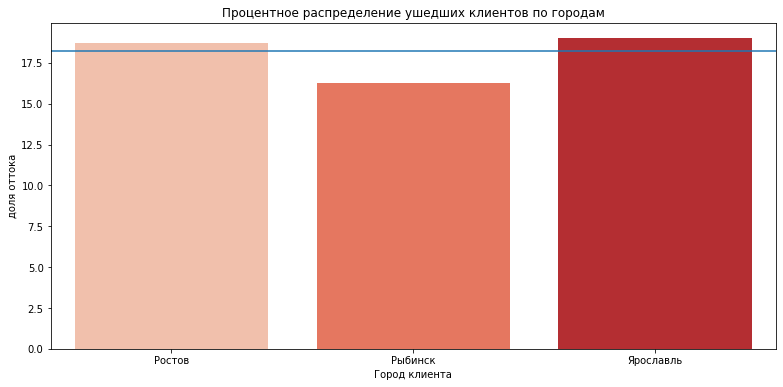

,count,sum,proportion
,churn,churn,
city,,,
Ростов,1416,265,18.714689
Рыбинск,2682,436,16.256525
Ярославль,5875,1117,19.012766


In [37]:
city = data.pivot_table(index = 'city', values = 'churn', aggfunc = ['count', 'sum'])
city['proportion'] = city['sum']/city['count']*100
plt.figure(figsize=(13,6))
sns.barplot(x=city.index,y=city['proportion'], palette="Reds")
plt.title("Процентное распределение ушедших клиентов по городам")
plt.xlabel("Город клиента")
plt.ylabel("доля оттока")
plt.xticks(rotation=0)
plt.axhline(data['churn'].mean()*100)
plt.show()
city  

В целом распределение ушедших клиентов по городам равномерно. Максимальное значение по доле оттока в Ярославле(19%), на втором месте по оттоку Ростов(18.7%), в то время как в Рыбинске процент минимальный(16%). 

Отток по городам распределен без сиоьных разниц между городами, однако клиенты из Ростова и Ярославля превышают средний показатель по банку, поэтому будут считаться более склонной к оттоку группой.

Теперь изучим распределение по половому признаку. 

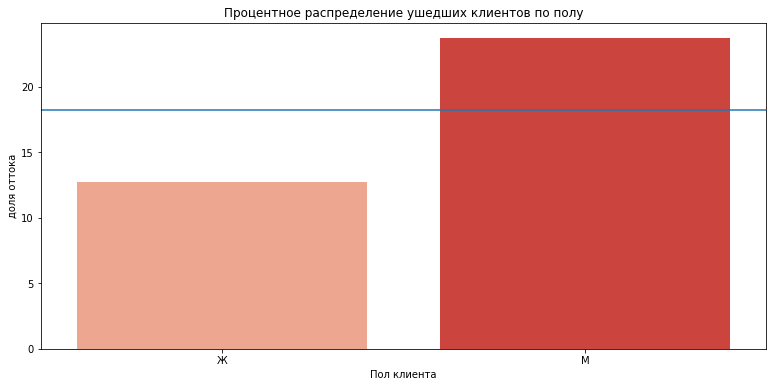

,count,sum,proportion
,churn,churn,
gender,,,
Ж,4982,635,12.745885
М,4991,1183,23.702665


In [38]:
gender = data.pivot_table(index = 'gender', values = 'churn', aggfunc = ['count', 'sum'])
gender['proportion'] = gender['sum']/gender['count']*100
plt.figure(figsize=(13,6))
sns.barplot(x=gender.index,y=gender['proportion'], palette="Reds")
plt.title("Процентное распределение ушедших клиентов по полу")
plt.xlabel("Пол клиента")
plt.ylabel("доля оттока")
plt.axhline(data['churn'].mean()*100)
plt.show()
gender

Как показывает барчарт, мужчины в 2 раза чаще попадают в категорию оттока(12.7 процентов), чем женщины(24 процентов).
Отток среди мужчин  превышает средний процент по банку, так что этот признак особенно важен при работе с уменьшением общей доли оттока.

Составим портрет типичного пользователя.

In [39]:
client = data.groupby('churn').agg({
    'score': 'mean',
    'age': 'mean',
    'gender': lambda x: x.value_counts().idxmax(),
    'city': lambda x: x.value_counts().idxmax(),
    'equity': 'median',
    'balance': 'mean',
    'products': 'median',
    'credit_card': 'median',
    'last_activity': 'median',
    'est_salary': 'mean'
}).T.rename(columns={0: 'остались', 1: 'ушли'})
client

churn,остались,ушли
score,845.396199,863.361936
age,43.020846,41.429593
gender,Ж,М
city,Ярославль,Ярославль
equity,3,4
balance,733031.630149,1134458.209291
products,2,2
credit_card,1,1
last_activity,0,1
est_salary,147674.637881,148357.483157


Мы можем заметить разницу по скорингу, полу, оценке собственности и активности. Разница в остальных параметрах скорее в рамках статистической погрешности.

</font><font color='Blue'> новый вывод: 
- средний уровень оттока 18.24 процента
- Средний уровень оттока по банку превышают следующие категории клиентов: 
    - клиенты мужчины 
    - клиенты из Ярославля и Ростове, хотя уровень оттока не сильно отоичается у всех представленных групп и примерно равномерно распределен
    - клиенты в пользовании у которых 2 и более товаров банка 
    - пользователи без кредитной карты
    - активные пользователи 
    - пользователи со скорингом выше 820
    - пользователи с оценкой собственности выше 3 
    
    </b></font><br>

**Шаг4. Статистический анализ данных**
<a id="5"></a>


Сформулируем первую гипотезу.

    Нулевая гипотеза: Доходы ушедших и оставшихся клиентов равны .

    Альтернативная гипотеза: Доходы ушедших и оставшихся клиентов не равны.
    
 Проверим с помощью t-test и с помощью u-test.

In [40]:
from scipy import stats as st

In [41]:
#начнем с t-test
results = st.ttest_ind(data[data['churn']==0]['est_salary'],
                       data[data['churn']==1]['est_salary'])

alpha = 0.05

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.8500882387258035
Не получилось отвергнуть нулевую гипотезу


In [42]:
#u test
alpha = .05

results = st.mannwhitneyu(data[data['churn']==0]['est_salary'], data[data['churn']==1]['est_salary'], True,'two-sided')

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')    
else:
    print('Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя') 

p-значение:  0.00016830729188229058
Отвергаем нулевую гипотезу: разница статистически значима


Мы видим разницу в результатах, так как эти два теста имеют разные подходы для проверки гипотез.

U-тест (или тест Манна-Уитни) не требует предположения о нормальности распределения. Основная гипотеза для U-теста заключается в том, что две выборки имеют одинаковые распределения.

T-тест, в свою очередь, основан на нормальном распределении данных и используется для сравнения средних значений двух выборок. Он более чувствителен к выбросам и требует выполнения условий о нормальности распределения и равенстве дисперсий. Основная гипотеза для t-теста заключается в том, что средние значения двух выборок равны.

В данном случае стоит доверять U-тесту, так как по этому показателю датасета есть выбросы в виде особо состоятельных клиентов и т-тест не актуален.

Приходим к выводу, что мы можем опровергнуть гипотезу о равенстве доходов ушедших и оставшихся клиентов.

Переходим ко второй гипотезе.

    Нулевая гипотеза: Среднее количество баллов собственности у ушедших и оставшихся клиентов равны.

    Альтернативная гипотеза: Среднее количество баллов собственности у ушедших и оставшихся клиентов не равны.
    
В этом случае применим т-тест, так как выбросов нет и мы проверяем среднее значние.

In [43]:
results = st.ttest_ind(data[data['churn']==0]['equity'],
                       data[data['churn']==1]['equity'])

alpha = 0.05

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 2.801472548389952e-166
Отвергаем нулевую гипотезу


Проведенный тест подтвердил, что среднее количество баллов собственности отличается у группы оттока и у оставшихся клиентов.

Проверим третью гипотезу о количестве используемых продуктов банка. Так как в части исследовательского анализа мы заметили, что клиенты с более чем 3 товарами чаще попадали в отток, поэтому важно проверить эту гипотезу. 

    Нулевая гипотеза: Среднее количество используемых банковских товаров у ушедших и оставшихся клиентов равны.

    Альтернативная гипотеза: Среднее количество используемых банковских товаров у ушедших и оставшихся клиентов не равны.
    
В этом случае применим т-тест, так как выбросов нет и мы проверяем среднее значние.

In [44]:
results = st.ttest_ind(data[data['churn']==0]['products'],
                       data[data['churn']==1]['products'])

alpha = 0.05

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 2.5178746542447946e-208
Отвергаем нулевую гипотезу


Проведенный тест подтвердил, что среднее количество используемых продуктов от банка отличается у группы оттока и у оставшихся клиентов, что доказывает наши предположения из исследовательского анализа.

**Шаг5. Сегментация и приоритезация**

<a id="4"></a>

Как показывает весь проведенный анализ, мы должны делать акцент на следующие параметры:

- пол 

- количество продуктов в пользовании 

- оценка объектов собственности 

- наличие кредитной карты 

- активность пользователя

- скоринг

Сначала рассмотрим 3 главных параметра

Сегмент 1
- мужчина
- 3 и более продуктов в пользовании 

In [45]:
port1 = data.query('male == 1 and products >=3')
len(port1)

752

Общее количество пользователей в первом сегменте подходит оптимальному значению(от 300 до 2000). Посмотрим долю оттока по этой группе

In [46]:
port_1 = data.query('male == 1 and products >=3 and churn == 1 ')
len(port_1)

376

Мы видим что количество ушедших клиентов попадающих по этот признак равно 376 людям.

In [47]:
len(port_1)/len(port1)

0.5

Доля оттока в этом сегменте равна 50%.

Сегмент 2

- клиент без кредитной карты 
- оценка собственности более 4
- активный пользователь

In [48]:
port2 = data.query('credit_card == 0 and equity >=4 and last_activity == 1 ')
print ('Общее число пользователей в сегменте 2:', len(port2))

Общее число пользователей в сегменте 2: 892


In [49]:
port_2 = data.query('credit_card == 0 and equity >=4 and last_activity == 1 and churn == 1')
print ('Число отточных пользователей в сегменте 2:', len(port_2))

Число отточных пользователей в сегменте 2: 443


In [50]:
print ('Доля отточных пользователей в сегменте 2:', len(port_2)/len(port2)*100)

Доля отточных пользователей в сегменте 2: 49.66367713004484


Сегмент 3
 - скринг выше 800
 - мужчина 
 - нет кредитной карты 
 - активный пользователь

In [51]:
port3 = data.query('male == 1 and score >= 800 and credit_card == 0 and last_activity == 1')
print ('Общее число пользователей в сегменте 3:', len(port3))
port_3 = data.query('male == 1 and score >= 800 and credit_card == 0 and last_activity == 1 and churn == 1')
print ('Число отточных пользователей в сегменте 3:', len(port_3))
print ('Доля отточных пользователей в сегменте 3:', len(port_3)/len(port3)*100)

Общее число пользователей в сегменте 3: 609
Число отточных пользователей в сегменте 3: 293
Доля отточных пользователей в сегменте 3: 48.11165845648605


Сегмент 4

- женщина 
- нет кредитной карты 
- активный пользователь 
- собственность выше 4
- скор выше 800

In [52]:
port4 = data.query('male == 0 and credit_card == 0  and score >= 800 and equity >= 4 and last_activity == 1')
print ('Общее число пользователей в сегменте 4:', len(port4))
port_4 = data.query('male == 0  and credit_card == 0 and score >= 800 and equity >= 4 and last_activity == 1 and churn == 1')
print ('Число отточных пользователей в сегменте 4:', len(port_4))
print ('Доля отточных пользователей в сегменте 4:', len(port_4)/len(port4)*100)

Общее число пользователей в сегменте 4: 435
Число отточных пользователей в сегменте 4: 200
Доля отточных пользователей в сегменте 4: 45.97701149425287


Сегмент 5 
- мужчина 
- менее 3 продуктв в пользовании 
- собственность выше 4
- нет кредитной карты 

In [53]:
port5 = data.query('male == 1 and products <= 3  and equity >= 4 and credit_card == 0 ')
print ('Общее число пользователей в сегменте 5:', len(port5))
port_5 = data.query('male == 1 and products <= 3  and equity >= 4 and credit_card == 0  and churn == 1')
print ('Число отточных пользователей в сегменте 5:', len(port_5))
print ('Доля отточных пользователей в сегменте 5:', len(port_5)/len(port5)*100)

Общее число пользователей в сегменте 5: 640
Число отточных пользователей в сегменте 5: 315
Доля отточных пользователей в сегменте 5: 49.21875


Сегмент 6
- женищна
- без кредитной карты 
- менее 3 продуктов в пользовании
- собственность выше 4 
- активный пользователь

In [54]:
port6 = data.query('male == 0 and credit_card == 0 and products <=3 and score>= 800 and equity >= 4 and last_activity == 1')
print ('Общее число пользователей в сегменте 6:', len(port6))
port_6 = data.query('male == 0  and credit_card == 0  and products <=3 and score >= 800 and equity >= 4 and last_activity == 1 and churn == 1')
print ('Число отточных пользователей в сегменте 6:', len(port_6))
print ('Доля отточных пользователей в сегменте 6:', len(port_6)/len(port6)*100)

Общее число пользователей в сегменте 6: 389
Число отточных пользователей в сегменте 6: 189
Доля отточных пользователей в сегменте 6: 48.58611825192802


**Приоритизируем сегменты по доле оттока**

Сегмент 1 
- мужчина
- 3 и более продуктов в пользовании 

Доля оттока 50%

Сегмент 2

- клиент без кредитной карты 
- оценка собственности более 4
- активный пользователь

Доля оттока 50%

Сегмент 3 (вместо 5 сегмента взяла 6, так как в целом рекомендации для 1 2 и 6 сегмента помогут решить проблемы с оттоком 5, а доля оттока не сильно отличается )
- женищна
- без кредитной карты 
- менее 3 продуктов в пользовании
- собственность выше 4 
- активный пользователь

Доля оттока 49 процентов



Анализируя данные банка "Метанпром" мы можем выделить следующие выводы:
- Корреляция с оттоком:
 - сильная с показателями не выявлена 
 - умеренная выявлена с количеством используемых банковский товаров(0.3)
 - слабая с собственность клиента (0.27), активностью пользователя(0.17), с полом клиента(0.14), с наличием кредитной карты(-0.13), с кредитным скорингом (0.11)
- средний уровень оттока 18.24 процентов
средний уровень оттока 18.24 процента
- Средний уровень оттока по банку превышают следующие категории клиентов: 
    - клиенты мужчины 
    - клиенты из Ярославля и Ростове, хотя уровень оттока не сильно отоичается у всех представленных групп и примерно равномерно распределен
    - клиенты в пользовании у которых 2 и более товаров банка 
    - пользователи без кредитной карты
    - активные пользователи 
    - пользователи со скорингом выше 820
    - пользователи с оценкой собственности выше 3 
- Были протестированы 3 гипотезы об отличиях показателей ушедших и оставшихся клиентов: 
 - первая гипотеза о равенстве доходов клиентов оттока и оставшихся не подтвердилась  
 - вторая гипотеза о равестве среднего количества баллов собственноости у двух групп клиентов не подтвердилась
 - третья гипотеза о равенстве среднего количества используемых товаров у двух групп клиентов не подтвердилась 
- Для статистического теста были использованы u-test и t-test
    
Рекомендации для трех выбранных сегментов:
    
1. - мужчина
- 3 и более продуктов в пользовании 
    
    
Рекомендации:

- Предложить повышенный кэшбек на "мужские" разделы такие как барбершопы, спортивные магазины, билеты на футбольные матчи, мужские магазины одежды и аксессуары
- предожить дополнительные привелегияи по начислению зарплаты или пенсии на карту банка 
- предложить более выгодные условия за использование более одного товара от банка или специальную систему лояльности
    
2. 
- клиент без кредитной карты 
- оценка собственности более 4
- активный пользователь  
    
    
Рекомендации: 
    
- Предложить бесплатное открытие кредитной карты с более выгодными условиями, чем у конкурентов.
- Предложить бесплатное обслуживание кредитной карты в течение первого года.
- Предложить возможность получения кэшбэка или бонусных баллов за использование кредитной карты.
- Предложить возможность получения скидок и привилегий у партнеров банка при оплате кредитной картой.
- Предложить условия страхование собственности лучше чем в других банках
- Предложить премиум карты с отсуствием ограничений на переводы и повышенные кэшбеки (доходность говорит об обеспеченности группы)
    
3. 
- женищна
- без кредитной карты 
- менее 3 продуктов в пользовании
- собственность выше 4 
- активный пользователь
    
    
Рекомендации: 

- Повышенный кэшбек на "женские" товары такие как одежда, косметика, товары для дома и для детей, салоны красоты и тд
- Разослать информацию о всех товарах банка которые могут быть интересны по почте или проинформировать через звонки
- все рекомндации для 2 сегмента относительно кредитной карты 
- Предложить условия страхование собственности лучше чем в других банках
    

Относительно всех клиентов актуальна рекомендация об улучшении обслуживания, предоставлении более удобных и инновационных услуг, чтобы удержать клиентов и привлечь новых.
</b></font><br>